In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
mean_0 = np.array([2, 10])
cov_0 = [[1., 1.8], [1.8, 1.5]]

mean_1 = np.array([4, 7])
cov_1 = [[1., 0.5], [0.5, 1.5]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


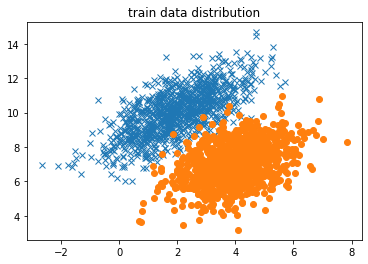

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: covariance is not positive-semidefinite.
  


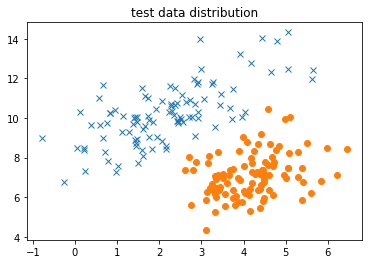

In [4]:
n_train = 1000

x0, y0 = np.random.multivariate_normal(mean_0, cov_0, n_train).T
x1, y1 = np.random.multivariate_normal(mean_1, cov_1, n_train).T

plt.plot(x0, y0, 'x')
plt.plot(x1, y1, 'o')
plt.title("train data distribution")
plt.show()


n_test = 100

test_x0, test_y0 = np.random.multivariate_normal(mean_0, cov_0, n_test).T
test_x1, test_y1 = np.random.multivariate_normal(mean_1, cov_1, n_test).T

plt.plot(test_x0, test_y0, 'x')
plt.plot(test_x1, test_y1, 'o')
plt.title("test data distribution")
plt.show()

In [5]:
class_0 = list(zip(x0, y0))
class_1 = list(zip(x1, y1))

 # print(class_0)
 # print(len(class_0))

In [6]:
def generate_input(class_0, class_1):
  x = np.array(class_0 + class_1)
  # x = np.concatenate((class_0, class_1), axis = 0).reshape(len(class_0) + len(class_1), 1)
  y = np.concatenate((np.zeros(len(class_0)), np.ones(len(class_1))), axis= 0).reshape(len(class_0) + len(class_1), 1)
  return x, y

# data, label
x, y = generate_input(class_0, class_1)  

print(x.shape)
print(y.shape)

(2000, 2)
(2000, 1)


In [7]:
print(y)

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


In [8]:
class LogisticRegression:
  def __init__(self, train_data, label_data, lr = 1e-2, delta = 1e-7, max_iter = 10000, cost_threshold = 1e-2, class_threshold = 0.5, verbose = True):
    self.x_data = train_data
    self.y_data = label_data
    self.lr = lr
    self.max_iter = max_iter
    self.delta = delta
    self.cost_threshold = cost_threshold
    self.class_threshold = class_threshold
    self.verbose = verbose
  
  def sigmoid(self, x):
    return 1/(1 + np.exp(-x))

  def loss_func(self, h, y): 
    # !log(0)
    return - np.sum(y * np.log(h + self.delta) + (1 - y)*np.log((1-h) + self.delta))

  def train(self):

    self.w = np.random.rand(2,1)
    self.b = np.random.rand(1)

    for i in range(self.max_iter):

      w_list.extend(self.w[0])
      

      z = np.dot(self.x_data, self.w) + self.b # (100,)
      h = self.sigmoid(z) # predicted possibility of x, (10,)
      
      diff = h - self.y_data #(100, 100)

      cost = self.loss_func(h, self.y_data)

      gradient = np.dot(self.x_data.transpose(), diff) #(1, 100)

      self.w -= self.lr * gradient / self.x_data.shape[0] #(pred - y) * x
      self.b -= self.lr * np.mean(diff) / self.x_data.shape[0] #(pred - y)


      if cost < self.cost_threshold:
        return False

      if (self.verbose == True and i %10000 == 0):
        print('cost of {} iteration: {}'.format(i, cost))
        #print(w_list)

    


  def predict(self, x):
    z = np.dot(x, self.w) + self.b
    h = self.sigmoid(z) # predicted possibility of x, confidence

    h_class = 1 if h > self.class_threshold else 0


    return h, h_class


  def getwb(self):
    return self.w, self.b

cost of 0 iteration: 6452.389608303687
cost of 10000 iteration: 256.28013339091626
cost of 20000 iteration: 255.23362417570598
cost of 30000 iteration: 254.1956618352979
cost of 40000 iteration: 253.16618096748172
cost of 50000 iteration: 252.14511629795828
cost of 60000 iteration: 251.13240269003228
cost of 70000 iteration: 250.12797515409142
cost of 80000 iteration: 249.13176885686744
cost of 90000 iteration: 248.14371913048973
cost of 100000 iteration: 247.16376148132008
cost of 110000 iteration: 246.19183159858085
cost of 120000 iteration: 245.22786536276897
cost of 130000 iteration: 244.2717988538622
cost of 140000 iteration: 243.3235683593174
cost of 150000 iteration: 242.38311038185935
cost of 160000 iteration: 241.45036164706687
cost of 170000 iteration: 240.52525911075304
cost of 180000 iteration: 239.6077399661425
cost of 190000 iteration: 238.69774165084743
cost of 200000 iteration: 237.79520185364396
cost of 210000 iteration: 236.9000585210499
cost of 220000 iteration: 236.

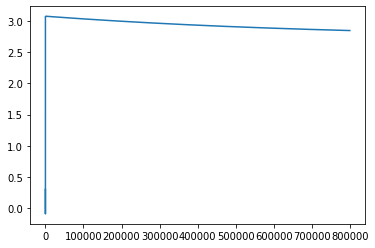

[0.3033258253838571, -0.08867515377791502, 0.705254102014584, 0.4065506106572598, 1.2000017338598878, 0.8637438077732533, 1.6557278757031098, 1.3284135663843863, 2.107811401287013, 1.7483375395055594]


In [12]:
if __name__ == "__main__":
  
  #n_iter = 500000
  n_iter = 800000
  LR = LogisticRegression(train_data = x, label_data = y, lr = 0.4, max_iter = n_iter)

  w_list = []
 
  LR.train()

  # plot w
  it = np.arange(n_iter)  
  plt.plot(it, w_list)
  plt.show()

  print(w_list[:10])

In [13]:
(predicted_prob, predicted_class) = LR.predict((2, 6))
print(predicted_prob, predicted_class)

(predicted_prob, predicted_class) = LR.predict((2, 7))
print(predicted_prob, predicted_class)

(predicted_prob, predicted_class) = LR.predict((2, 8))
print(predicted_prob, predicted_class)

(predicted_prob, predicted_class) = LR.predict((2, 9))
print(predicted_prob, predicted_class)

(predicted_prob, predicted_class) = LR.predict((2, 10))
print(predicted_prob, predicted_class)

(predicted_prob, predicted_class) = LR.predict((4, 7))
print(predicted_prob, predicted_class)

[0.60742109] 1
[0.2793097] 0
[0.0884861] 0
[0.02373845] 0
[0.00605374] 0
[0.99133934] 1


In [14]:
(w, b) = LR.getwb()
print(w, b)

[[ 2.84407726]
 [-1.38437301]] [3.05456823]


In [17]:
#x, y = generate_input(class_0, class_1) 
print(np.min(x[:, 1]))

3.183113211973496


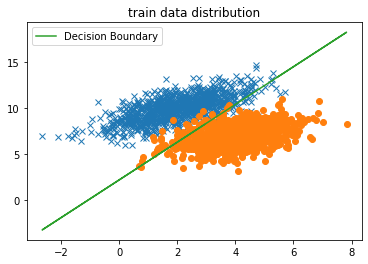

In [22]:
plt.plot(x0, y0, 'x')
plt.plot(x1, y1, 'o')
plt.title("train data distribution")

x_values = x[:, 0].reshape(len(x[:, 0]), 1)
y_values = - (b + np.dot(x_values, w[0])) / w[1]

plt.plot(x_values, y_values, label='Decision Boundary')
plt.legend()
plt.show()

In [23]:
# performance 
import sklearn.metrics as metrics
import pandas as pd

test_0 = list(zip(test_x0, test_y0))
test_1 = list(zip(test_x1, test_y1))

test_x, test_y = generate_input(test_0, test_1)  
test = list(zip(test_x, test_y))

test_y = test_y.reshape(test_y.shape[0],).astype(int)
y_conf = pd.DataFrame({"test_y": test_y.tolist()})

predicted_y = np.array([])

for idx, (val, label) in enumerate(test):
  (predicted_prob, predicted_class) = LR.predict(val)
  predicted_y = np.append(predicted_y, predicted_class)
  
  y_conf.loc[idx, 'confidence'] = predicted_prob
  y_conf.loc[idx, 'predicted_class'] = predicted_class

print(y_conf.head())

y_conf = y_conf.sort_values(by = ['confidence'], ascending = False)
print('\nSorted')
print(y_conf.head())


   test_y  confidence  predicted_class
0       0    0.005715              0.0
1       0    0.001586              0.0
2       0    0.015743              0.0
3       0    0.011810              0.0
4       0    0.041236              0.0

Sorted
     test_y  confidence  predicted_class
135       1    0.999980              1.0
134       1    0.999968              1.0
101       1    0.999965              1.0
142       1    0.999963              1.0
153       1    0.999939              1.0


In [24]:
# accuracy = (tp + tn) / (tp + tn + fp + fn)
accuracy = np.mean(np.equal(predicted_y, test_y))

tp = np.sum(predicted_y * test_y == 1)
# precision = tp / (tp + fp)
# tp, fp: predicted positive
precision = tp / np.sum(predicted_y)

# recall = tp / (tp + fn)
# tp, fn: labeled positive
recall = tp / np.sum(test_y)



print('accuracy: ', accuracy)
print('precision: ', precision)
print('recall: ', recall)

print('\n')

print('accuracy', metrics.accuracy_score(test_y, predicted_y))
print('precision', metrics.precision_score(test_y, predicted_y))
print('recall', metrics.recall_score(test_y, predicted_y))

accuracy:  0.97
precision:  0.9519230769230769
recall:  0.99


accuracy 0.97
precision 0.9519230769230769
recall 0.99


In [25]:
y_conf = y_conf.reset_index(drop = True)

# get precision, recall by confidence (cumulated tp, fp)
for i in y_conf.index:
  tp_i = np.sum(y_conf['predicted_class'][:i+1] * y_conf['test_y'][:i+1] == 1)
  fp_i = np.sum(y_conf['predicted_class'][:i+1]) - tp_i

  y_conf.loc[i, 'cumulated tp'] = tp_i
  y_conf.loc[i, 'cumulated fp'] = fp_i

  y_conf.loc[i, 'precision'] = tp_i / np.sum(y_conf['predicted_class'][:i+1])
  y_conf.loc[i, 'recall'] = tp_i / np.sum(test_y)

In [26]:
pd.set_option('display.max_columns', None)
print(y_conf)

     test_y  confidence  predicted_class  cumulated tp  cumulated fp  \
0         1    0.999980              1.0           1.0           0.0   
1         1    0.999968              1.0           2.0           0.0   
2         1    0.999965              1.0           3.0           0.0   
3         1    0.999963              1.0           4.0           0.0   
4         1    0.999939              1.0           5.0           0.0   
..      ...         ...              ...           ...           ...   
195       0    0.000101              0.0          99.0           5.0   
196       0    0.000026              0.0          99.0           5.0   
197       0    0.000020              0.0          99.0           5.0   
198       0    0.000014              0.0          99.0           5.0   
199       0    0.000009              0.0          99.0           5.0   

     precision  recall  
0     1.000000    0.01  
1     1.000000    0.02  
2     1.000000    0.03  
3     1.000000    0.04  
4     1.00

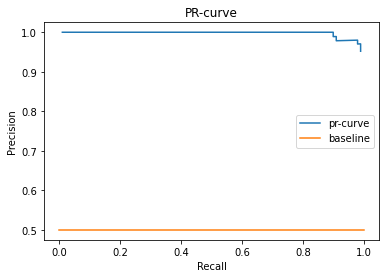

In [27]:
# PR-curve

plt.title("PR-curve")
plt.xlabel('Recall') 
plt.ylabel('Precision') 
plt.plot(y_conf.loc[:, 'recall'], y_conf.loc[:, 'precision'], label='pr-curve')

# Baseline = P / (P + total)
# baseline보다 pr-curve가 위에 있을 수록 좋은 모델이다.
baseline = n_test / (2* n_test)
baseline = np.array([baseline]*2)
x = np.array(range(0,2))

plt.plot(x, baseline, label = 'baseline')

plt.legend()
plt.show()

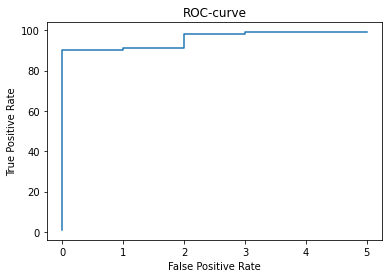

In [28]:
# Receiver Operating Characteristic
plt.plot(y_conf.loc[:, 'cumulated fp'], y_conf.loc[:, 'cumulated tp'])
plt.title("ROC-curve")
plt.xlabel('False Positive Rate') # Specificity
plt.ylabel('True Positive Rate') # Sensitive

# y=x 그래프보다 위에 있을 수록 좋은 모델이다.
#plt.plot(y_conf.loc[:, 'cumulated tp'], y_conf.loc[:, 'cumulated tp'])
plt.show()  